In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import linear_model
from tqdm import tqdm_notebook as tqdm

import ampy
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
alpha = 0.5
N = 1024
M = int(N * alpha)

A = np.random.normal(0.0, 1.0/ M**0.5, (M, N))
x_0 = np.random.normal(0.0, 1.0, N)
x_0 = np.random.binomial(1.0, 0.1, N) * x_0
y = A @ x_0 + np.random.normal(0.0, 1e-1 * 2, M)

# lasso by coordinate descent (x_0 vs lasso_estimate)

In [4]:
lasso_cv = linear_model.LassoCV(cv=5, n_jobs=2, tol=1e-5)
lasso_cv.fit(A, y)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=2, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=1e-05,
    verbose=False)

In [5]:
lasso = linear_model.Lasso(alpha=lasso_cv.alpha_, tol=1e-12, max_iter=1e5)
lasso.fit(A, y)

Lasso(alpha=0.0004386565050817556, copy_X=True, fit_intercept=True,
   max_iter=100000.0, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=1e-12, warm_start=False)

No handles with labels found to put in legend.


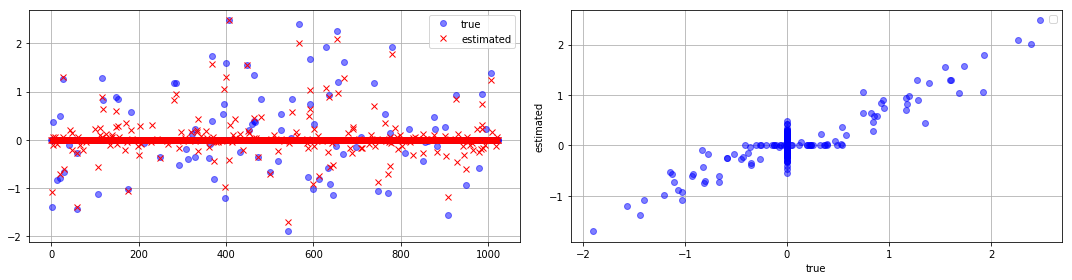

In [6]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(121)
ax.plot(x_0, "o", c="b", alpha =0.5, label="true")
ax.plot(lasso.coef_, "x", c="r", label="estimated")
ax.grid()
ax.legend()

ax = fig.add_subplot(122)
ax.plot(x_0, lasso.coef_, "o", c="b", alpha=0.5)
ax.set_xlabel("true")
ax.set_ylabel("estimated")
ax.grid()
ax.legend()

fig.tight_layout()

# lasso coordinate descent (anneal)

In [7]:
lasso = linear_model.Lasso(alpha=lasso_cv.alpha_, tol=1e-12, max_iter=1e5, warm_start=True)
l_list = lasso_cv.alpha_ * np.logspace(2, 0, base=10.0, num=100)
solution_lasso_list = []
lasso.alpha = l_list[0]
lasso.fit(A, y)
t1 = time.time()
for l in tqdm(l_list[1:]):
    lasso.alpha = l
    lasso.fit(A, y)
t2 = time.time()
print(t2 - t1, "sec")



0.8883748054504395 sec


In [8]:
dumping = 1.0
tol = 1e-3
max_iteration = 100

l_list = M * lasso_cv.alpha_ * np.logspace(2, 0, base=10.0, num=100)
vamp_solver = ampy.NaiveLMMSEVAMPSolver.NaiveLMMSEVAMPSolver(A, y, l_list[0], dumping)

vamp_solver.dumping = 1.0
vamp_solver.solve(max_iteration=max_iteration, tolerance=tol)
vamp_solver.dumping = dumping

solution_list = []
t1 = time.time()
for i, l in tqdm(enumerate(l_list[1:]), total=len(l_list[1:])):
    vamp_solver.l = l
    vamp_solver.solve(max_iteration=max_iteration, tolerance=tol, message=False)
    solution_list.append(vamp_solver.x1_hat.copy())
#     print()
t2 = time.time()
print(t2 - t1, "sec")

converged
diff x 3.736914667045105e-26
diff chi 0.0



converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff chi 0.0

converged
diff x 3.728544557929532e-26
diff ch

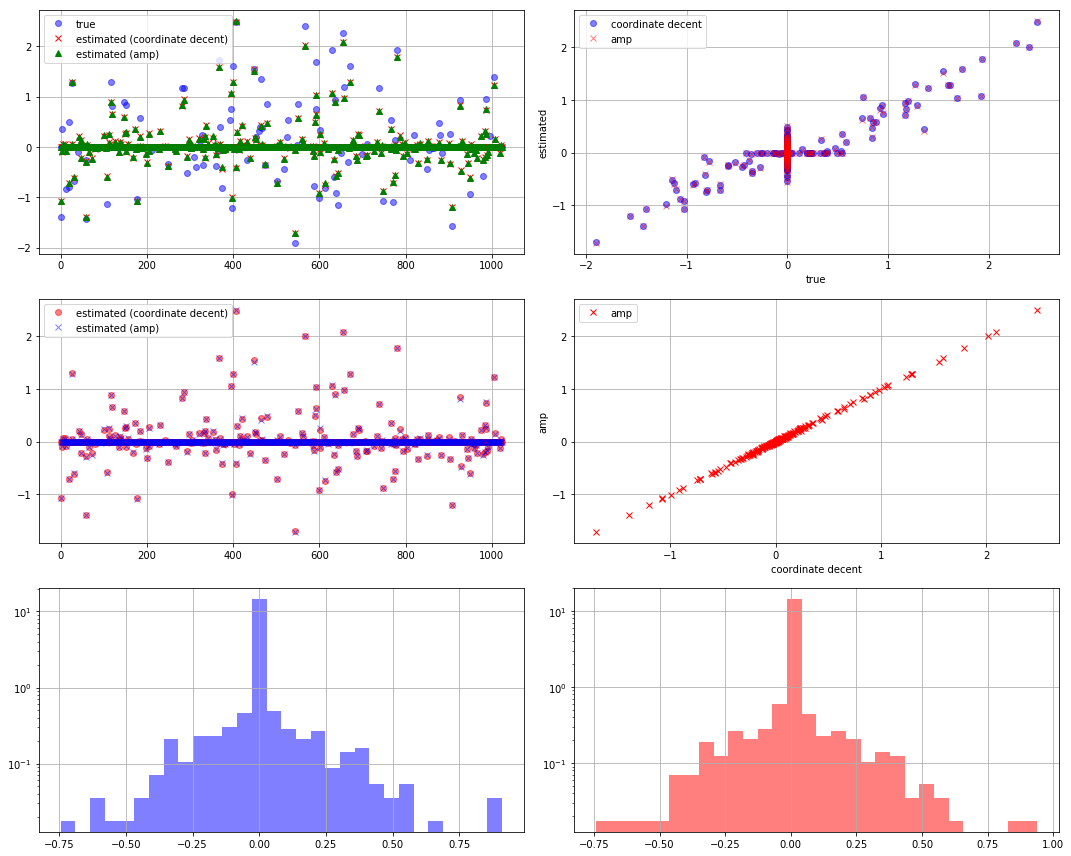

In [9]:

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(321)
ax.plot(x_0, "o", c="b", alpha =0.5, label="true")
ax.plot(lasso.coef_, "x", c="r", label="estimated (coordinate decent)")
ax.plot(vamp_solver.x1_hat, "^", c="g", label="estimated (amp)")
ax.grid()
ax.legend()

ax = fig.add_subplot(322)
ax.plot(x_0, lasso.coef_, "o", c="b", alpha=0.5, label="coordinate decent")
ax.plot(x_0, vamp_solver.x1_hat, "x", c="r", label="amp", alpha=0.5)
ax.set_xlabel("true")
ax.set_ylabel("estimated")
ax.grid()
ax.legend()

ax = fig.add_subplot(323)
ax.plot(lasso.coef_, "o", c="r", label="estimated (coordinate decent)", alpha=0.5)
ax.plot(vamp_solver.x1_hat, "x", c="b", label="estimated (amp)", alpha=0.5)
ax.grid()
ax.legend()

ax = fig.add_subplot(324)
ax.plot(lasso.coef_, vamp_solver.x1_hat, "x", c="r", label="amp")
ax.set_xlabel("coordinate decent")
ax.set_ylabel("amp")
ax.grid()
ax.legend()

ax = fig.add_subplot(325)
ax.hist(x_0 - lasso.coef_, density=True, bins=30, log=True, facecolor="b", alpha=0.5)
ax.grid()

ax = fig.add_subplot(326)
ax.hist(x_0 - vamp_solver.x1_hat, density=True, bins=30, log=True, facecolor="r", alpha=0.5)
ax.grid()


fig.tight_layout()

In [10]:
tol = 1e-4
max_iteration = 100

l_list = M * lasso_cv.alpha_ * np.logspace(2, 0, base=10.0, num=100)
vamp_solver = ampy.NaiveLMMSEVAMPSolver.NaiveLMMSEVAMPSolver(A, y, l_list[0] * np.ones(N), 1.0, clip_min=1e-9, clip_max=1e9)

vamp_solver.dumping = 0.9
vamp_solver.solve(max_iteration=max_iteration, tolerance=tol)


converged
diff x 2.6874556865703618e-05
diff chi 3.942855735931722e-08



In [11]:
vamp_solver.l = l_list[-1] * np.ones(N)
vamp_solver.dumping = 0.95
estimator_list = []
gamma_1_list = []
gamma_2_list = []
for i in tqdm(range(50)):
    vamp_solver.solve(max_iteration=1, tolerance=tol)
    estimator = vamp_solver.x1_hat
    gamma_1_list.append(vamp_solver.eta1[vamp_solver.eta1 < vamp_solver.clip_max*0.5].mean() )
    gamma_2_list.append(vamp_solver.eta2[vamp_solver.eta2 < vamp_solver.clip_max*0.5].mean() )
    estimator_list.append(estimator)
diff_list = []
for estimator in estimator_list:
    diff = np.linalg.norm(x_0 - estimator)**2 / np.linalg.norm(x_0)**2
    diff_list.append(diff)

does not converged
diff x 0.9523908747864435
diff chi 4.066696686737098

does not converged
diff x 0.477017205499787
diff chi 1.9931358682364386

does not converged
diff x 0.20230775080602925
diff chi 0.1884561841015202

does not converged
diff x 0.10360920921947256
diff chi 0.35800937090883506

does not converged
diff x 0.042802934202341124
diff chi 0.09791637539954165

does not converged
diff x 0.01683516100224053
diff chi 0.07373949969900988

does not converged
diff x 0.0054818246064945115
diff chi 0.023718708082556526

does not converged
diff x 0.002203889276106274
diff chi 0.010173556978613057

does not converged
diff x 0.0008632759263711045
diff chi 0.011973952560479492

does not converged
diff x 0.00047349117721553916
diff chi 0.0041410124537243215

does not converged
diff x 0.0001637252221749804
diff chi 0.0004442223077995995

does not converged
diff x 4.4851209016987706e-05
diff chi 0.0080156214451385

does not converged
diff x 0.0002573168546354963
diff chi 0.0011693638623138

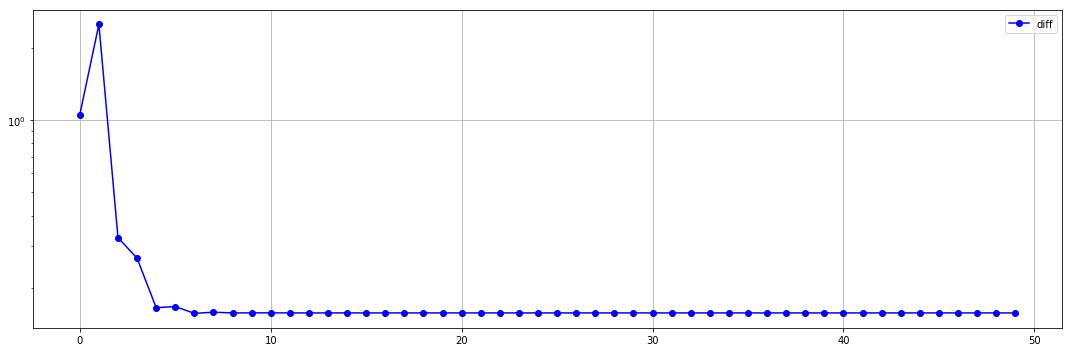

In [12]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(diff_list, "-o", c="b", label="diff")
# ax.plot(gamma_1_list, "-o", c="r", label="gamma_1")
# ax.plot(gamma_2_list, "-o", c="g", label="gamma_2")
ax.legend()
ax.set_yscale("log")
# ax.set_xscale("log")
# ax.set_ylim([0.0, 1e2])
ax.grid()
fig.tight_layout()